# Libraries for Neural Networks - Pybrain 2

In [1]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 1.5 MB 3.8 MB/s
  Created wheel for PyBrain: filename=PyBrain-0.3.1-py3-none-any.whl size=468230 sha256=a78d57640f0f93018def6b1dbd5722c313e344fc926370f1c07527cc7349701b
  Stored in directory: /tmp/pip-ephem-wheel-cache-gritm03h/wheels/ea/68/6d/74c3ea34a0e8263c72bff928915f86b72ec7634f6f2ffb491f
Successfully built PyBrain


In [4]:
import pybrain

In [5]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer

In [12]:
# buildNetwork(inputlayer num, hiddenlayer num, outputlayer num)
# default outclass = LinearLayer
network = buildNetwork(2, 3, 1, outclass = SigmoidLayer, hiddenclass = SigmoidLayer, bias = False)

In [7]:
# check inputlayer's type
print(network['in'])

<LinearLayer 'in'>


In [8]:
# if you want to check other hidden layer, add more hidden layer
# if you append more than one hidden layer, change param's num
print(network['hidden0'])

<SigmoidLayer 'hidden0'>


In [11]:
print(network['out'])

<SigmoidLayer 'out'>

In [ ]:
# Because of 'bias = False'
print(network['bias'])

In [16]:
# SupervisedDataSet(input num, output num)
dataset = SupervisedDataSet(2, 1)
dataset.addSample((0,0), (0,))
dataset.addSample((0,1), (1,))
dataset.addSample((1,0), (1,))
dataset.addSample((1,1), (0,))

In [17]:
print(dataset['input'])

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


In [18]:
print(dataset['target'])

[[0.]
 [1.]
 [1.]
 [0.]]


In [19]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.1)

In [20]:
epochs = 10000
error = []
for epoch in range (epochs):
  # optimizer.train() : update weights, calculate error
  error_average = optimizer.train()
  if epoch % 1000 == 0:
    print('Epoch: ', (epoch + 1), 'Error: ', error_average)
    error.append(error_average)

Epoch:  1 Error:  0.1699901028689547
Epoch:  1001 Error:  0.10999461594994948
Epoch:  2001 Error:  0.06959018631472522
Epoch:  3001 Error:  0.026174026120441184
Epoch:  4001 Error:  0.013218646204515455
Epoch:  5001 Error:  0.008598269140353259
Epoch:  6001 Error:  0.0063293109588341365
Epoch:  7001 Error:  0.004995024613614559
Epoch:  8001 Error:  0.004119801664216005
Epoch:  9001 Error:  0.0035025920083203927


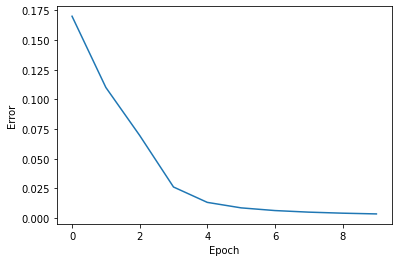

In [21]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)
plt.show()

In [22]:
# check weights
print(network.params)

[-2.9875433   5.45163267  4.86971502  4.81097968  5.62916337 -3.06051607
 -7.12716451 10.04817768 -7.10320619]


In [23]:
# predicted result of (0,0)
print(network.activate([0,0]))

[0.10996521]
